In [1]:
!pip install -r requirements.txt

In [ ]:
#%cd C:/Users/miche/Documents/PatchTST/PatchTST_supervised
#!bash ./scripts/PatchTST/weather_attention.sh



C:\Users\miche\Documents\PatchTST\PatchTST_supervised


C:\Users\miche\anaconda3\envs\patchtst\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
%cd C:/Users/miche/Documents/PatchTST/PatchTST_supervised/scripts/PatchTST
%run weather.py



C:\Users\miche\Documents\PatchTST\PatchTST_supervised\scripts\PatchTST
Running experiment with pred_len=192, logging to ./logs/LongForecasting/PatchTST_Attention_weather_336_192.log ...
python: can't open file 'C:\\Users\\miche\\Documents\\PatchTST\\PatchTST_supervised\\run_longExp_attention.py': [Errno 2] No such file or directory
Experiment for pred_len=192 finished.

All experiments completed.


In [5]:
%cd C:/Users/miche/Documents/PatchTST/PatchTST_supervised/scripts/PatchTST
%run weather_jena.py

C:\Users\miche\Documents\PatchTST\PatchTST_supervised\scripts\PatchTST
Running experiment with pred_len=10, logging to ./logs/LongForecasting/PatchTST_Attention_weather_int_336_10.log ...
Args in experiment:
Namespace(random_seed=2021, is_training=0, model_id='weather_int_336_10', model='PatchTST_Attention', data='custom', root_path='C:/Users/miche/Documents/PatchTST/PatchTST_supervised/dataset/', data_path='weather_int.csv', features='MS', target='T (degC)', freq='h', checkpoints='./checkpoints/', seq_len=336, label_len=10, pred_len=10, fc_dropout=0.2, head_dropout=0.0, patch_len=16, stride=8, padding_patch='end', revin=1, affine=0, subtract_last=0, decomposition=0, kernel_size=25, individual=1, embed_type=0, enc_in=7, dec_in=7, c_out=1, d_model=70, n_heads=7, e_layers=3, d_layers=1, d_ff=280, moving_avg=25, factor=1, distil=True, dropout=0.2, embed='timeF', activation='gelu', output_attention=True, do_predict=True, num_workers=4, itr=1, train_epochs=100, batch_size=128, patience=25, 

In [ ]:
%cd

# Plots for Performance

In [2]:

import numpy as np
q
# Load the predictions and ground truth
preds = np.load("C:/Users/miche/Documents/PatchTST/PatchTST_supervised/scripts/PatchTST/results/weather_int_336_36_PatchTST_Attention_custom_ftMS_sl336_ll24_pl36_dm70_nh7_el3_dl1_df280_fc1_ebtimeF_dtTrue_Exp_0/pred.npy")
truths = np.load("C:/Users/miche/Documents/PatchTST/PatchTST_supervised/scripts/PatchTST/results/weather_int_336_36_PatchTST_Attention_custom_ftMS_sl336_ll24_pl36_dm70_nh7_el3_dl1_df280_fc1_ebtimeF_dtTrue_Exp_0/true.npy")

print("Predictions shape:", preds.shape)
print("Ground truth shape:", truths.shape)


Predictions shape: (10496, 36, 1)
Ground truth shape: (10496, 36, 1)


In [12]:

import numpy as np

# Load the predictions and ground truth
preds = np.load("C:/Users/miche/Documents/PatchTST/PatchTST_supervised/scripts/PatchTST/results/weather_int_336_10_PatchTST_Attention_custom_ftMS_sl336_ll10_pl10_dm70_nh7_el3_dl1_df280_fc1_ebtimeF_dtTrue_Exp_0/pred.npy")
truths = np.load("C:/Users/miche/Documents/PatchTST/PatchTST_supervised/scripts/PatchTST/results/weather_int_336_10_PatchTST_Attention_custom_ftMS_sl336_ll10_pl10_dm70_nh7_el3_dl1_df280_fc1_ebtimeF_dtTrue_Exp_0/true.npy")

print("Predictions shape:", preds.shape)
print("Ground truth shape:", truths.shape)


Predictions shape: (10496, 10, 1)
Ground truth shape: (10496, 10, 1)


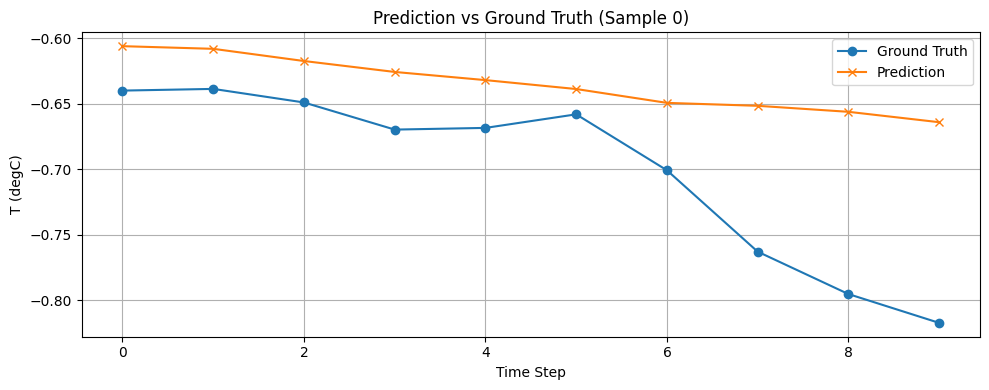

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
preds = preds  # shape (10496, 36, 1)
truths = truths  # shape (10496, 36, 1)

# Remove last dimension for plotting (optional)
pred = preds[0].squeeze()       # shape (36,)
true = truths[0].squeeze()      # shape (36,)

# Plot
plt.figure(figsize=(10, 4))
plt.plot(true, label="Ground Truth", marker='o')
plt.plot(pred, label="Prediction", marker='x')
plt.title("Prediction vs Ground Truth (Sample 0)")
plt.xlabel("Time Step")
plt.ylabel("T (degC)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


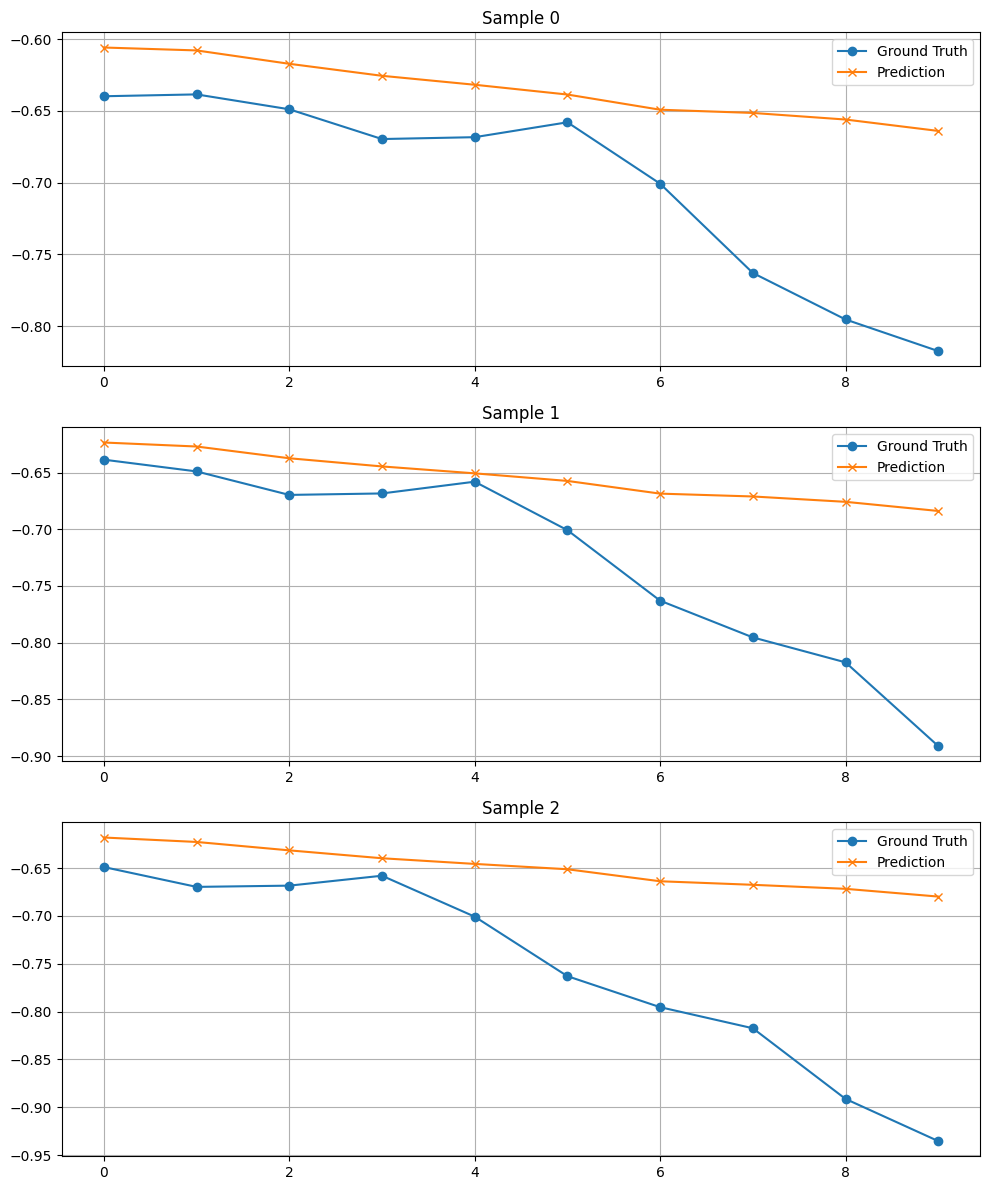

In [8]:
n_samples = 3  # number of forecast windows to show
fig, axes = plt.subplots(n_samples, 1, figsize=(10, 4 * n_samples))

for i in range(n_samples):
    pred = preds[i].squeeze()
    true = truths[i].squeeze()
    axes[i].plot(true, label="Ground Truth", marker='o')
    axes[i].plot(pred, label="Prediction", marker='x')
    axes[i].set_title(f"Sample {i}")
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()


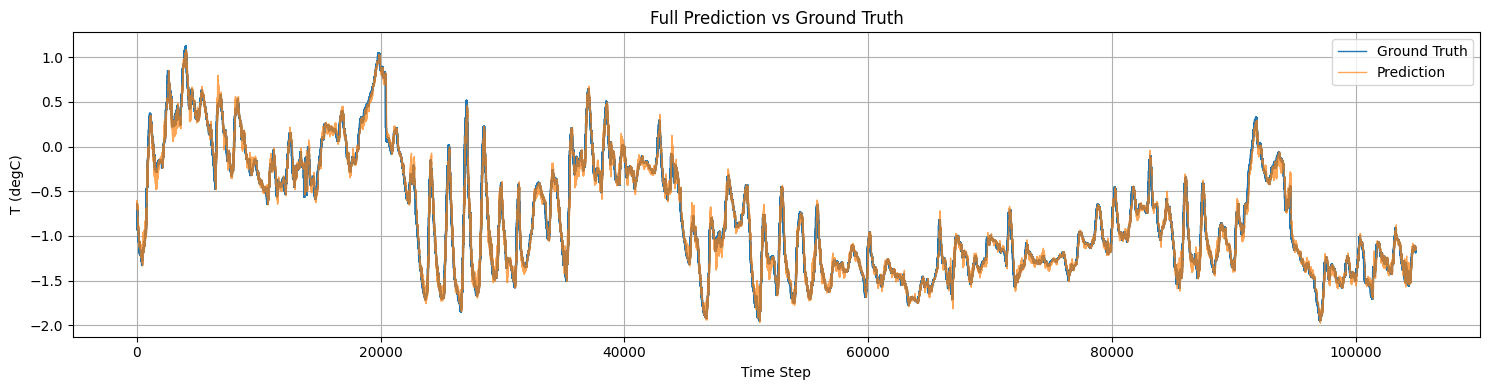

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Load and reshape
preds = preds.reshape(-1)    # (10496 * 36,) = full predicted timeline
truths = truths.reshape(-1)  # (10496 * 36,) = full ground truth

# Plot entire sequence
plt.figure(figsize=(15, 4))
plt.plot(truths, label="Ground Truth", linewidth=1)
plt.plot(preds, label="Prediction", linewidth=1, alpha=0.7)
plt.title("Full Prediction vs Ground Truth")
plt.xlabel("Time Step")
plt.ylabel("T (degC)")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


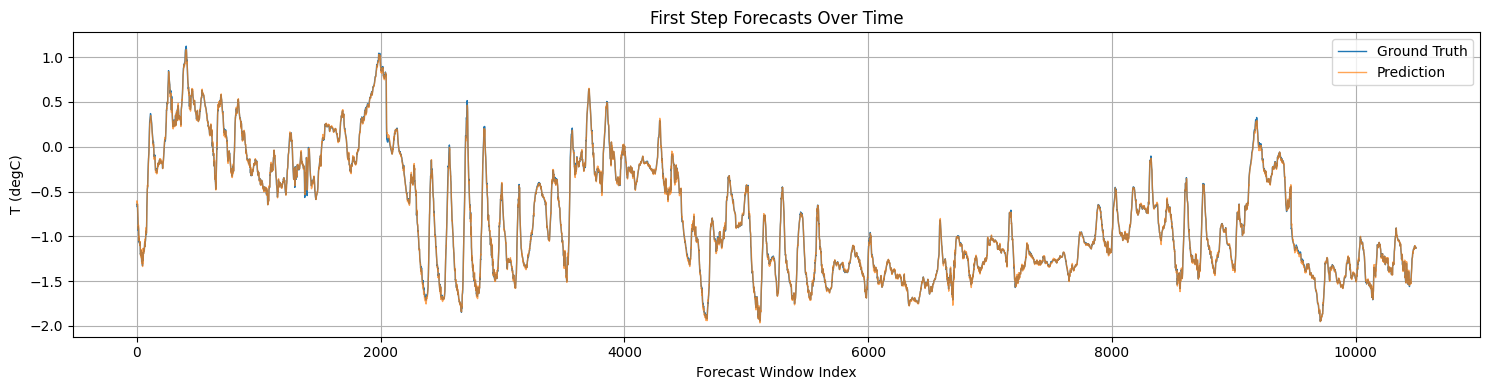

In [13]:
# Take only the first prediction and first ground truth from each window
pred_seq = preds[:, 0, 0]   # shape (10496,)
true_seq = truths[:, 0, 0]  # shape (10496,)

plt.figure(figsize=(15, 4))
plt.plot(true_seq, label="Ground Truth", linewidth=1)
plt.plot(pred_seq, label="Prediction", linewidth=1, alpha=0.7)
plt.title("First Step Forecasts Over Time")
plt.xlabel("Forecast Window Index")
plt.ylabel("T (degC)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

step = 0  # 0 = 1-step ahead, 4 = 5-step ahead, etc.

y_pred_step = preds[:, step, 0]
y_true_step = truths[:, step, 0]

rmse = np.sqrt(mean_squared_error(y_true_step, y_pred_step))
mae = mean_absolute_error(y_true_step, y_pred_step)

print(f"Step {step+1} → RMSE: {rmse:.4f}, MAE: {mae:.4f}")


Step 1 → RMSE: 0.0225, MAE: 0.0155


In [15]:
for step in [0, 4, 9]:  # 0-indexed → steps 1, 5, 10
    y_pred_step = preds[:, step, 0]
    y_true_step = truths[:, step, 0]
    
    rmse = np.sqrt(mean_squared_error(y_true_step, y_pred_step))
    mae = mean_absolute_error(y_true_step, y_pred_step)
    
    print(f"Step {step+1} → RMSE: {rmse:.4f}, MAE: {mae:.4f}")


Step 1 → RMSE: 0.0225, MAE: 0.0155
Step 5 → RMSE: 0.0671, MAE: 0.0472
Step 10 → RMSE: 0.1112, MAE: 0.0808


In [16]:
# preds_real, truths_real: numpy arrays of shape (N_samples, 36, 1)
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1) Slice to first 10 steps (0-9 in zero-based)
y_pred_10 = preds[:, :10, 0]  # → shape (N, 10)
y_true_10 = truths[:, :10, 0]

# 2) Flatten
y_pred_flat = y_pred_10.ravel()   # → shape (N*10,)
y_true_flat = y_true_10.ravel()

# 3) Compute aggregated metrics
rmse_10 = np.sqrt(mean_squared_error(y_true_flat, y_pred_flat))
mae_10  = mean_absolute_error(y_true_flat, y_pred_flat)

print(f"PatchTST (avg over steps 1–10) → RMSE: {rmse_10:.3f}, MAE: {mae_10:.3f}")


PatchTST (avg over steps 1–10) → RMSE: 0.075, MAE: 0.050


In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the full dataset
df = pd.read_csv("C:/Users/miche/Documents/PatchTST/PatchTST_supervised/dataset/weather_int.csv")

# Extract only the target column (same as in your dataset)
target = 'T (degC)'
data = df[[target]].values

# Match train split logic (70% of total rows)
num_train = int(len(data) * 0.7)
train_data = data[:num_train]

# Recreate and fit the scaler
scaler = StandardScaler()
scaler.fit(train_data)


StandardScaler()

In [19]:
# Load your model outputs
preds_ = preds.reshape(-1, 1)
truths_ = truths.reshape(-1, 1)

# Apply inverse transform
preds_real = scaler.inverse_transform(preds_).reshape(10496,10 , 1)
truths_real = scaler.inverse_transform(truths_).reshape(10496, 10, 1)


In [20]:
# preds_real, truths_real: numpy arrays of shape (N_samples, 36, 1)
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1) Slice to first 10 steps (0-9 in zero-based)
y_pred_10 = preds_real[:, :10, 0]  # → shape (N, 10)
y_true_10 = truths_real[:, :10, 0]

# 2) Flatten
y_pred_flat = y_pred_10.ravel()   # → shape (N*10,)
y_true_flat = y_true_10.ravel()

# 3) Compute aggregated metrics
rmse_10 = np.sqrt(mean_squared_error(y_true_flat, y_pred_flat))
mae_10  = mean_absolute_error(y_true_flat, y_pred_flat)

print(f"PatchTST (avg over steps 1–10) → RMSE: {rmse_10:.3f} °C, MAE: {mae_10:.3f} °C")


PatchTST (avg over steps 1–10) → RMSE: 0.581 °C, MAE: 0.384 °C


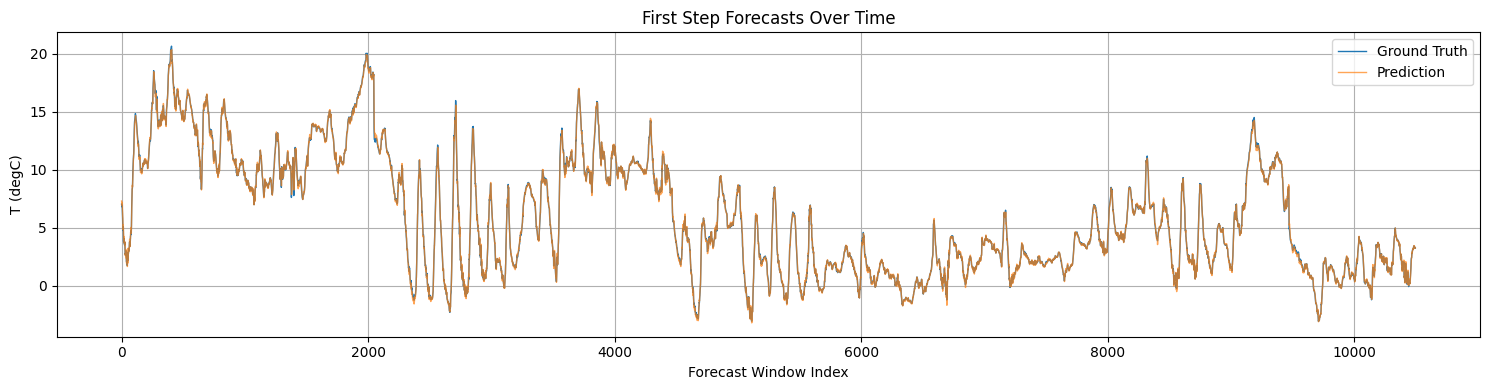

In [21]:
# Take only the first prediction and first ground truth from each window
pred_seq_real = preds_real[:, 0, 0]   # shape (10496,)
true_seq_real = truths_real[:, 0, 0]  # shape (10496,)

plt.figure(figsize=(15, 4))
plt.plot(true_seq_real, label="Ground Truth", linewidth=1)
plt.plot(pred_seq_real, label="Prediction", linewidth=1, alpha=0.7)
plt.title("First Step Forecasts Over Time")
plt.xlabel("Forecast Window Index")
plt.ylabel("T (degC)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [33]:
# preds_real and truths_real should have shape (10496, 36, 1)
#reds_real = scaler.inverse_transform(preds.reshape(-1, 1)).reshape(10496, 36, 1)
#truths_real = scaler.inverse_transform(truths.reshape(-1, 1)).reshape(10496, 36, 1)


In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

for step in [0, 4, 9]:  # 0-based indexing = step 1, 5, 10
    y_pred_step = preds_real[:, step, 0]
    y_true_step = truths_real[:, step, 0]
    
    rmse = np.sqrt(mean_squared_error(y_true_step, y_pred_step))
    mae = mean_absolute_error(y_true_step, y_pred_step)
    
    print(f"Step {step+1} → RMSE: {rmse:.3f} °C, MAE: {mae:.3f} °C")


Step 1 → RMSE: 0.174 °C, MAE: 0.120 °C
Step 5 → RMSE: 0.518 °C, MAE: 0.364 °C
Step 10 → RMSE: 0.858 °C, MAE: 0.624 °C


In [23]:
import numpy as np

# Flatten to 2D for inverse_transform
preds_flat = preds.reshape(-1, 1)     # shape: (10496 * 36, 1)
truths_flat = truths.reshape(-1, 1)

# Apply inverse transform
preds_real = scaler.inverse_transform(preds_flat)
truths_real = scaler.inverse_transform(truths_flat)

# Reshape back to original
preds_real = preds_real.reshape(10496,10 , 1)
truths_real = truths_real.reshape(10496, 10, 1)


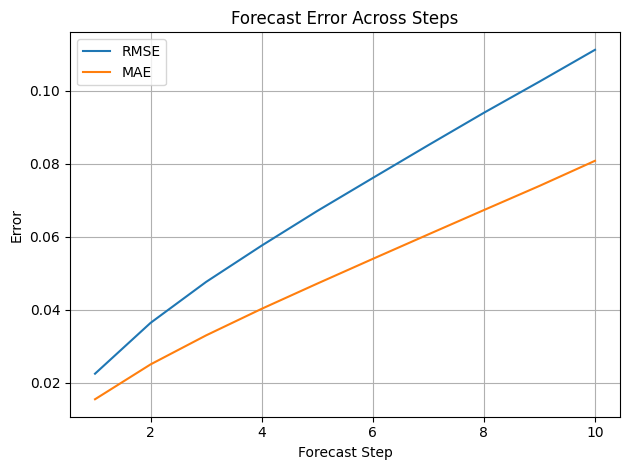

In [24]:
rmse_list = []
mae_list = []

for step in range(preds.shape[1]):
    y_pred_step = preds[:, step, 0]
    y_true_step = truths[:, step, 0]
    
    rmse = np.sqrt(mean_squared_error(y_true_step, y_pred_step))
    mae = mean_absolute_error(y_true_step, y_pred_step)
    
    rmse_list.append(rmse)
    mae_list.append(mae)

# Plot
import matplotlib.pyplot as plt

plt.plot(range(1, preds.shape[1]+1), rmse_list, label='RMSE')
plt.plot(range(1, preds.shape[1]+1), mae_list, label='MAE')
plt.xlabel('Forecast Step')
plt.ylabel('Error')
plt.title('Forecast Error Across Steps')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# TimeSHAP

In [ ]:
import torch

# Your model definition (make sure this matches how you trained it)
from your_model_file import PatchTST  # modify as needed

model = PatchTST(...)
model.load_state_dict(torch.load("checkpoint.pth", map_location='cpu'))
model.eval()


In [1]:
def predict_fn(batch_input_np):
    """
    TimeSHAP expects input: np.ndarray of shape (B, T, C)
    PatchTST expects input: torch.Tensor (B, T, C)
    """
    model.eval()
    with torch.no_grad():
        input_tensor = torch.tensor(batch_input_np, dtype=torch.float32)
        pred = model(input_tensor)  # shape: (B, pred_len, C)
        # Extract the first prediction step and first variable
        return pred[:, 0, 0].cpu().numpy()  # Modify as needed


In [2]:
import os
print("Current working directory:", os.getcwd())
os.chdir('C:/Users/miche/Documents/PatchTST/PatchTST_supervised/')
print("Now in:", os.getcwd())


Current working directory: C:\Users\miche\Documents\PatchTST\PatchTST_supervised
Now in: C:\Users\miche\Documents\PatchTST\PatchTST_supervised


In [1]:
from torch.utils.data import DataLoader
from data_provider.data_loader import Dataset_Custom
seq_len=84
label_len=48
pred_len=48
dataset = Dataset_Custom(
    root_path='C:/Users/miche/Documents/PatchTST/PatchTST_supervised/dataset/',
    flag='test',
    size=[seq_len, label_len, pred_len],
    features='MS',
    data_path='jena_climate_2014_2016_40min.csv',
    target='T (degC)',
)

loader = DataLoader(dataset, batch_size=1, shuffle=False)
sample = next(iter(loader))

seq_x, seq_y, seq_x_mark, seq_y_mark = sample  # each is shape [1, T, C] or similar
input_sample = seq_x.squeeze(0).numpy()        # shape (T, C)


In [2]:
class Args:
    # random seed
    random_seed = 2021

    # basic config
    is_training = 1
    model_id = 'test'
    model = 'PatchTST_Attention'

    # data loader
    data = 'ETTm1'
    root_path = './data/ETT/'
    data_path = 'ETTh1.csv'
    features = 'MS'
    target = 'T (degC)'
    freq = 'h'
    checkpoints = './checkpoints/'

    # forecasting task
    seq_len = 84
    label_len = 48
    pred_len = 48

    # PatchTST
    fc_dropout = 0.2
    head_dropout = 0.0
    patch_len = 16
    stride = 8
    padding_patch = 'end'
    revin = 1
    affine = 0
    subtract_last = 0
    decomposition = 0
    kernel_size = 25
    individual = 1  # True

    # Formers
    embed_type = 0
    enc_in = 14
    dec_in = 14
    c_out = 1
    d_model = 140
    n_heads = 14
    e_layers = 3
    d_layers = 1
    d_ff = 560
    moving_avg = 25
    factor = 1
    distil = True
    dropout = 0.2
    embed = 'timeF'
    activation = 'gelu'
    output_attention = True
    do_predict = False

    # optimization
    num_workers = 8
    itr = 1
    train_epochs = 50
    batch_size = 128
    patience = 5
    learning_rate = 0.0001
    des = 'Exp'
    loss = 'mse'
    lradj = 'type3'
    pct_start = 0.3
    use_amp = False

    # GPU
    use_gpu = True
    gpu = 0
    use_multi_gpu = False
    devices = '0,1,2,3'
    test_flop = False


args = Args()



In [3]:
# Example: assuming your model was initialized and loaded like this
from models.PatchTST_Attention import Model
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize (use the correct args you used for training)
model =Model(args).to(device)

# Load weights if needed
checkpoint_path = 'C:/Users/miche/Documents/PatchTST/PatchTST_supervised/scripts/PatchTST/checkpoints/weather_jena_84_48/checkpoint.pth'
model.load_state_dict(torch.load(checkpoint_path, map_location=device))
model.eval()


Model(
  (model): PatchTST_backbone(
    (revin_layer): RevIN()
    (padding_patch_layer): ReplicationPad1d((0, 8))
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=16, out_features=140, bias=True)
      (dropout): Dropout(p=0.2, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0): TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=140, out_features=140, bias=True)
              (W_K): Linear(in_features=140, out_features=140, bias=True)
              (W_V): Linear(in_features=140, out_features=140, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=140, out_features=140, bias=True)
                (1): Dropout(p=0.2, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.2, inplace=False)
   

  0%|          | 0/1 [00:00<?, ?it/s]

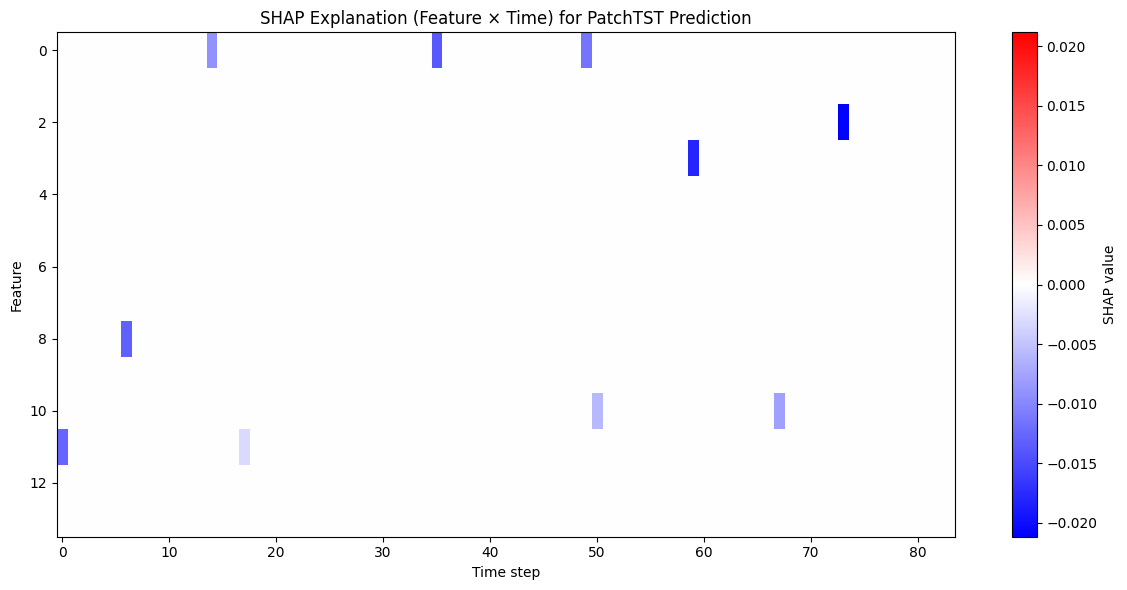

In [7]:
import numpy as np
import shap
import matplotlib.pyplot as plt
# --- Prediction function adapted for shap ---
def predict_fn(batch_input_np):
    # batch_input_np shape: (B, T*C)
    B = batch_input_np.shape[0]
    input_tensor = torch.tensor(batch_input_np.reshape(B, T, C), dtype=torch.float32).to(device)
    with torch.no_grad():
        pred = model(input_tensor)  # shape: (B, pred_len, C)
        # Return a 1D numpy array with predictions for shap
        return pred[:, 0, 0].cpu().numpy()

# --- Load your dataset ---
seq_len = 84
label_len = 48
pred_len = 48

dataset = Dataset_Custom(
    root_path='C:/Users/miche/Documents/PatchTST/PatchTST_supervised/dataset/',
    flag='test',
    size=[seq_len, label_len, pred_len],
    features='MS',
    data_path='jena_climate_2014_2016_40min.csv',
    target='T (degC)',
)
loader = DataLoader(dataset, batch_size=1, shuffle=False)

# --- Prepare data samples ---
X = []
for i, sample in enumerate(loader):
    if i >= 20:  # Take first 20 for background + explanation
        break
    seq_x, _, _, _ = sample
    X.append(seq_x.squeeze(0).numpy())  # (T, C)

X = np.stack(X)  # (20, T, C)

# --- Flatten to 2D for SHAP (samples, features) where features = T*C ---
T, C = X.shape[1], X.shape[2]
X_2d = X.reshape(X.shape[0], -1)  # (20, T*C)

# Use first 10 as background dataset for SHAP
X_background = X_2d[:10]

# Explain the 11th sample
X_to_explain = X_2d[10:11]  # shape (1, T*C)

# --- Initialize SHAP KernelExplainer ---
explainer = shap.KernelExplainer(predict_fn, X_background)

# --- Compute SHAP values ---
shap_values = explainer.shap_values(X_to_explain, nsamples=100)

# --- Reshape SHAP values back to (T, C) for visualization ---
shap_values_reshaped = shap_values.reshape(T, C).T  # shape (C, T)

# --- Plot heatmap ---
plt.figure(figsize=(12, 6))
plt.imshow(shap_values_reshaped, aspect='auto', cmap='bwr', vmin=-np.max(np.abs(shap_values_reshaped)), vmax=np.max(np.abs(shap_values_reshaped)))
plt.colorbar(label='SHAP value')
plt.xlabel('Time step')
plt.ylabel('Feature')
plt.title('SHAP Explanation (Feature × Time) for PatchTST Prediction')
plt.tight_layout()
plt.show()

In [43]:
import shap
print(shap.__file__)


C:\Users\miche\anaconda3\envs\patchtst\lib\site-packages\shap\__init__.py


In [22]:
import timeshap.explainer
print(dir(timeshap.explainer))


['Callable', 'List', 'Path', 'TimeShapKernel', 'Tuple', 'Union', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'cell_level', 'cell_top_events', 'cell_top_feats', 'considered_cells', 'copy', 'csv', 'event_explain_all', 'event_level', 'feat_explain_all', 'feature_level', 'global_methods', 'global_report', 'kernel', 'local_cell_level', 'local_event', 'local_feat', 'local_methods', 'local_pruning', 'local_report', 'np', 'os', 'pd', 'plot_cell_level', 'plot_event_heatmap', 'plot_feat_barplot', 'plot_global_event', 'plot_global_feat', 'plot_temp_coalition_pruning', 'prune_all', 'prune_given_data', 'pruning', 'pruning_statistics', 're', 'temp_coalition_pruning', 'timeshap_kernel', 'validate_global_input', 'validate_local_input']


In [ ]:
import matplotlib.pyplot as plt

# Plot SHAP values (aggregated or per-feature)
plt.plot(shap_values)
plt.title("TimeSHAP values")
plt.xlabel("Time steps")
plt.ylabel("SHAP value")
plt.show()


# Feature Evaluation

In [26]:
%cd C:/Users/miche/Documents/PatchTST/PatchTST_supervised/scripts/PatchTST/test_results/weather_int_336_10_PatchTST_Attention_custom_ftMS_sl336_ll10_pl10_dm70_nh7_el3_dl1_df280_fc1_ebtimeF_dtTrue_Exp_0/

C:\Users\miche\Documents\PatchTST\PatchTST_supervised\scripts\PatchTST\test_results\weather_int_336_10_PatchTST_Attention_custom_ftMS_sl336_ll10_pl10_dm70_nh7_el3_dl1_df280_fc1_ebtimeF_dtTrue_Exp_0


C:\Users\miche\anaconda3\envs\patchtst\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [29]:
attn.shape

(896, 7, 42, 42)

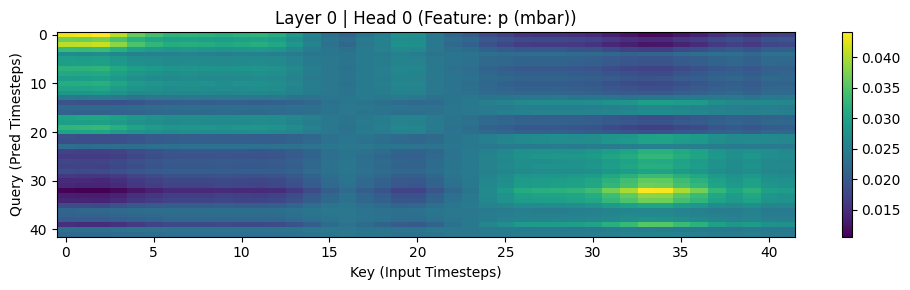

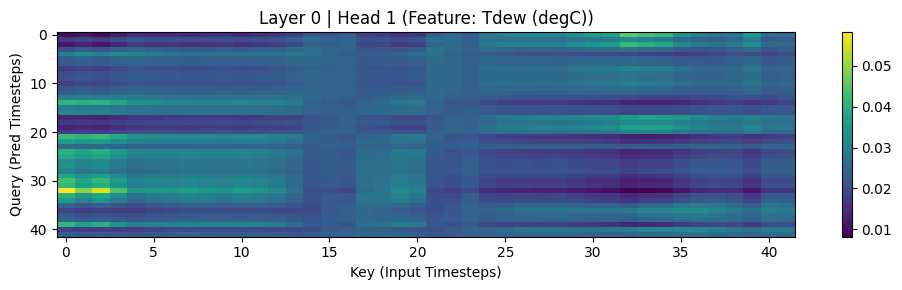

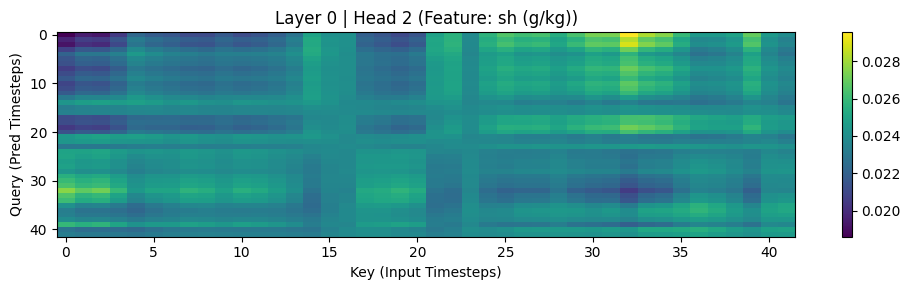

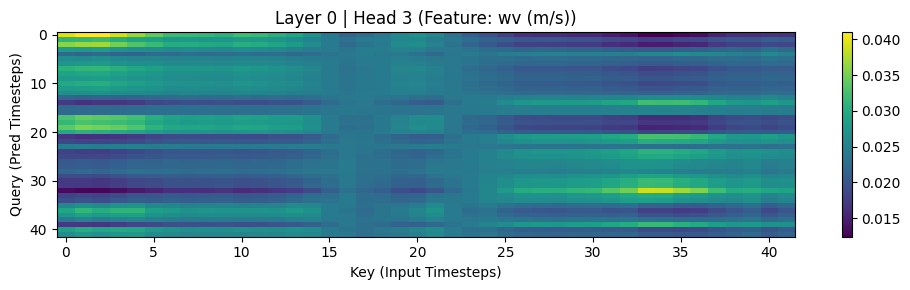

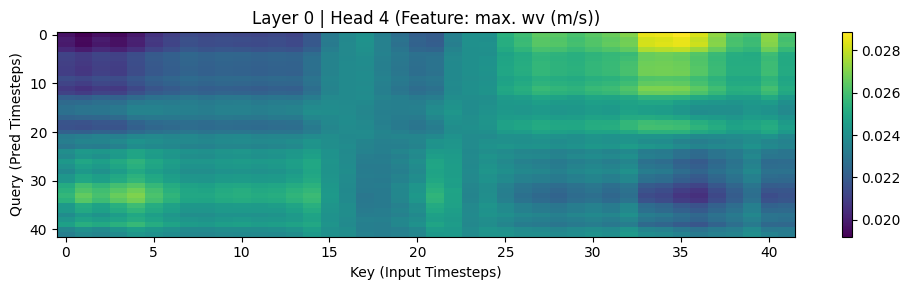

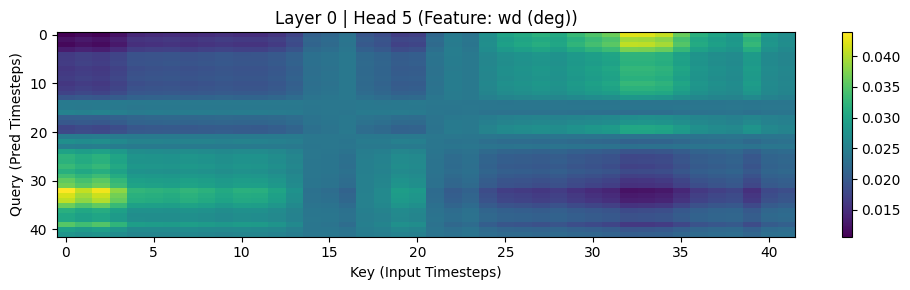

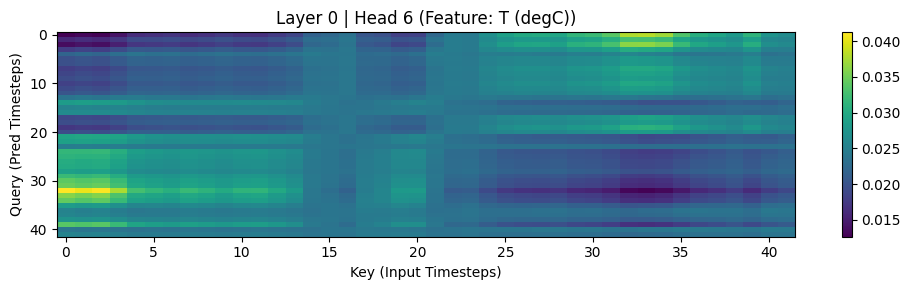

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Load attention
attn = np.load("attn_maps/attn_batch_0_layer_0.npy")  # shape: [B, 21, Q, K]
feature_names = ['p (mbar)', 'Tdew (degC)', 'sh (g/kg)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)', 'T (degC)']

#[f"Feature_{i}" for i in range(21)]  # or your actual feature names

# Pick a sample and a layer
sample = 0
layer = 0

for head in range(attn.shape[1]):
    plt.figure(figsize=(10, 3))
    plt.imshow(attn[sample, head], aspect='auto', cmap='viridis')
    plt.colorbar()
    plt.title(f"Layer {layer} | Head {head} (Feature: {feature_names[head]})")
    plt.xlabel("Key (Input Timesteps)")
    plt.ylabel("Query (Pred Timesteps)")
    plt.tight_layout()
    plt.show()


C:\Users\miche\AppData\Local\Temp\ipykernel_28996\1902206946.py:51: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\miche\AppData\Local\Temp\ipykernel_28996\1902206946.py:52: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.savefig("feature_importance_attention_fixed.png", dpi=300)
C:\Users\miche\anaconda3\envs\patchtst\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


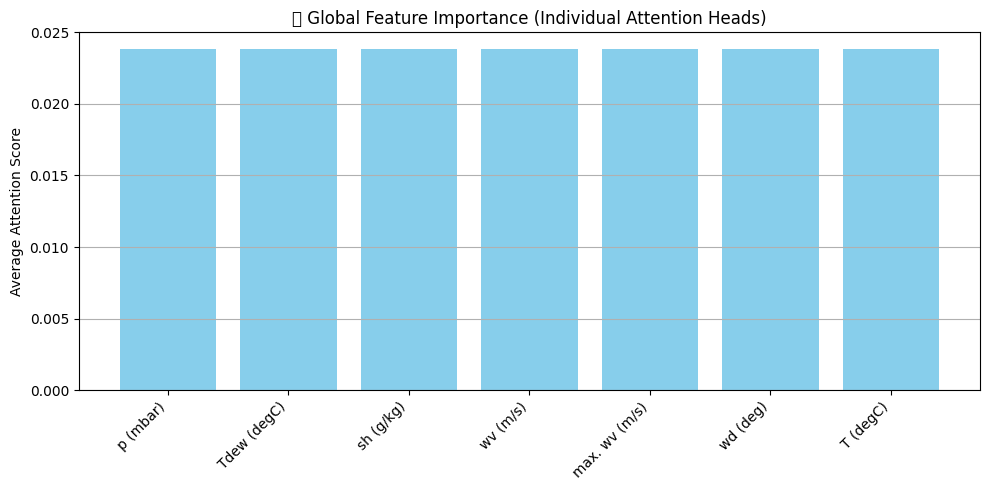

In [30]:
import numpy as np
import os
import matplotlib.pyplot as plt

attn_dir = "attn_maps"
num_layers = 3
num_batches = 82
num_heads = 7  # same as number of input features

# Initialize accumulators
feature_attn_total = np.zeros(num_heads)
feature_attn_count = np.zeros(num_heads)

for batch in range(num_batches):
    for layer in range(num_layers):
        file_path = os.path.join(attn_dir, f"attn_batch_{batch}_layer_{layer}.npy")

        if not os.path.exists(file_path) or os.path.getsize(file_path) == 0:
            continue

        try:
            attn = np.load(file_path)  # shape: [B, H, Q, K]

            if attn.ndim != 4 or attn.shape[1] != num_heads:
                print(f"Skipping invalid shape: {attn.shape}")
                continue

            # Aggregate per-head (per-feature) attention
            for h in range(num_heads):
                # Average attention for this head across batch, queries, and keys
                mean_attn = attn[:, h, :, :].mean()
                feature_attn_total[h] += mean_attn
                feature_attn_count[h] += 1

        except Exception as e:
            print(f"Error loading {file_path}: {e}")

# Final feature-wise average attention scores
feature_attn_avg = feature_attn_total / np.maximum(feature_attn_count, 1)

# --- Visualization ---
feature_names = ['p (mbar)', 'Tdew (degC)', 'sh (g/kg)', 'wv (m/s)', 
                 'max. wv (m/s)', 'wd (deg)', 'T (degC)']  # Your 7 features

plt.figure(figsize=(10, 5))
plt.bar(feature_names, feature_attn_avg, color='skyblue')
plt.ylabel("Average Attention Score")
plt.title("🌍 Global Feature Importance (Individual Attention Heads)")
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig("feature_importance_attention_fixed.png", dpi=300)
plt.show()


In [13]:
attn = np.load("attn_maps/attn_batch_0_layer_0.npy")  # shape (B, H, Q, K)
print("Shape:", attn.shape)

# Check per-head differences
diff = np.abs(attn[:, 0, :, :] - attn[:, 1, :, :]).mean()
print("Avg difference between head 0 and head 1:", diff)


Shape: (896, 7, 42, 42)
Avg difference between head 0 and head 1: 0.0054446026


In [14]:
variances = [attn[:, h, :, :].var() for h in range(attn.shape[1])]
print("Per-head variances:", variances)


Per-head variances: [5.3072443e-05, 1.6777061e-05, 4.9201364e-05, 9.252785e-06, 1.9203399e-05, 3.476473e-05, 7.5371645e-06]


In [10]:
print("Min, Max, Mean of attention across all heads and dims:")
print(attn.min(), attn.max(), attn.mean())

for head in range(num_heads):
    head_vals = attn[:, head, :, :].flatten()
    print(f"Head {head} - min: {head_vals.min()}, max: {head_vals.max()}, mean: {head_vals.mean()}")


Min, Max, Mean of attention across all heads and dims:
2.5726027e-05 0.835713 0.023809526
Head 0 - min: 0.0001827811065595597, max: 0.6238564848899841, mean: 0.02380952425301075
Head 1 - min: 0.00012960871390532702, max: 0.6952562928199768, mean: 0.02380952425301075
Head 2 - min: 2.5726027160999365e-05, max: 0.8357130289077759, mean: 0.0238095261156559
Head 3 - min: 0.0003110517282038927, max: 0.6202661395072937, mean: 0.0238095261156559
Head 4 - min: 0.0003462797321844846, max: 0.5012138485908508, mean: 0.02380952797830105
Head 5 - min: 0.00031337744439952075, max: 0.3434189558029175, mean: 0.023809531703591347
Head 6 - min: 0.007551003247499466, max: 0.078763447701931, mean: 0.0238095261156559


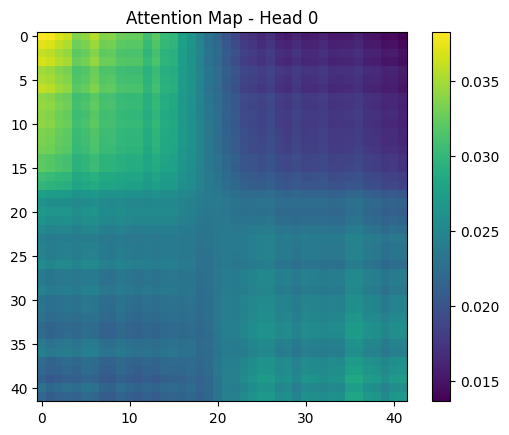

In [31]:
import matplotlib.pyplot as plt

head = 0
attn_map = attn[0, head, :, :]  # pick first batch element, first head
plt.imshow(attn_map, cmap='viridis')
plt.colorbar()
plt.title(f"Attention Map - Head {head}")
plt.show()


In [32]:
# For a loaded attention map
attn = np.load("attn_maps/attn_batch_0_layer_0.npy")  # shape: (B, H, Q, K)

# Step 1: Sum over the key dimension
sums = attn.sum(axis=-1)  # shape: (B, H, Q)

# Step 2: Check that these sums are close to 1
print("Min sum:", np.min(sums))
print("Max sum:", np.max(sums))
print("Mean sum:", np.mean(sums))


Min sum: 0.9999997
Max sum: 1.0000002
Mean sum: 1.0


# Temporal Attention

In [33]:
%cd C:/Users/miche/Documents/PatchTST/PatchTST_supervised/scripts/PatchTST/test_results/weather_int_336_10_PatchTST_Attention_custom_ftMS_sl336_ll10_pl10_dm70_nh7_el3_dl1_df280_fc1_ebtimeF_dtTrue_Exp_0/

C:\Users\miche\Documents\PatchTST\PatchTST_supervised\scripts\PatchTST\test_results\weather_int_336_10_PatchTST_Attention_custom_ftMS_sl336_ll10_pl10_dm70_nh7_el3_dl1_df280_fc1_ebtimeF_dtTrue_Exp_0


In [34]:
attn = np.load("attn_maps/attn_batch_0_layer_0.npy")  # [B * n_vars, H, Q, K]
B = 128
n_vars = 7
H, Q, K = attn.shape[1:]

attn = attn.reshape(B, n_vars, H, Q, K)
mean_attn = attn.mean(axis=(0, 2, 3))  # shape: [n_vars]


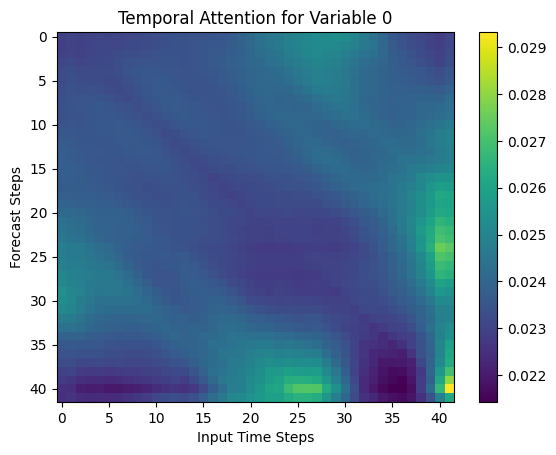

In [35]:
var_idx = 0  # pick a variable
attn_var = attn[:, var_idx].mean(axis=0)  # [H, Q, K]

avg_time_attn = attn_var.mean(axis=0)  # [Q, K]
plt.imshow(avg_time_attn, aspect='auto', cmap='viridis')
plt.title(f"Temporal Attention for Variable {var_idx}")
plt.xlabel("Input Time Steps")
plt.ylabel("Forecast Steps")
plt.colorbar()
plt.show()


In [36]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Config
attn_dir = "attn_maps"
num_layers = 3
num_batches = 82
num_heads = 7
num_vars = 7
input_steps = 42
batch_size = 128  # because 896 = 56 × 16

# Initialize accumulator
temporal_attn_total = np.zeros((num_vars, input_steps))
valid_files = 0

# Iterate over all attention maps
for batch in range(num_batches):
    for layer in range(num_layers):
        file_path = os.path.join(attn_dir, f"attn_batch_{batch}_layer_{layer}.npy")
        
        if not os.path.exists(file_path) or os.path.getsize(file_path) == 0:
            print(f"⚠️ Skipping: {file_path}")
            continue

        try:
            attn = np.load(file_path)  # shape: (896, 7, 42, 42)
            if attn.shape != (batch_size * num_vars, num_heads, input_steps, input_steps):
                print(f"⚠️ Unexpected shape: {attn.shape} in {file_path}")
                continue

            # Reshape to [B, N_vars, H, Q, K]
            attn = attn.reshape(batch_size, num_vars, num_heads, input_steps, input_steps)

            # Average over batch, heads, and query steps → leave K (input time steps)
            temporal_attn = attn.mean(axis=(0, 2, 3))  # shape: (N_vars, K)

            temporal_attn_total += temporal_attn
            valid_files += 1

        except Exception as e:
            print(f"❗ Error loading {file_path}: {e}")
            continue

# Normalize
if valid_files > 0:
    temporal_attn_avg = temporal_attn_total / valid_files
else:
    raise ValueError("No valid attention maps found!")

# Save heatmap as PNG
output_path = "temporal_attention_heatmap.png"

plt.figure(figsize=(12, 6))
im = plt.imshow(temporal_attn_avg, aspect='auto', cmap='viridis')

# Add labels
feature_names = ['p (mbar)', 'Tdew (degC)', 'sh (g/kg)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)', 'T (degC)'][:num_vars]

plt.yticks(ticks=np.arange(num_vars), labels=feature_names)
plt.xticks(ticks=np.linspace(0, input_steps - 1, 6), labels=[f"-{int(i)}" for i in np.linspace(input_steps, 0, 6, dtype=int)])
plt.xlabel("Input Time Step (earlier → later)")
plt.ylabel("Feature")
plt.title(f"🧠 Temporal Attention Heatmap ({valid_files} files)")
plt.colorbar(im, label="Avg Attention Weight")
plt.tight_layout()
plt.savefig(output_path, dpi=300)
plt.close()

print(f"✅ Heatmap saved as: {output_path}")


C:\Users\miche\AppData\Local\Temp\ipykernel_28996\3936104341.py:68: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\miche\AppData\Local\Temp\ipykernel_28996\3936104341.py:69: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.savefig(output_path, dpi=300)


✅ Heatmap saved as: temporal_attention_heatmap.png


 What the Heatmap Tells Us
Strong focus on the very earliest patch (~−42):
For almost every feature the model places unusually high attention on the oldest input window. This suggests your model is leveraging long-range patterns—perhaps weekly or multi-day cycles in weather.

Secondary peak at the most recent step (0):
There’s also consistently elevated attention on the newest data point—no surprise, since “what just happened” is usually the best short-term predictor.

Mid-lag trough (~−16 to −25):
Attention dips in the mid-past, indicating those middle lags are less informative than the extremes.

Feature-wise nuance:

Pressure (p (mbar)) and dew point (Tdew) show the tallest peaks at the far left—long-term memory is especially important there.

Wind variables (wv, max. wv, wd) have somewhat flatter profiles—more uniform attention across time.

Temperature (T (degC)) itself mirrors both patterns—a strong long-range component plus recency.

## Per layer

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import os

# ── Configuration ──────────────────────────────────────────────────────────
attn_dir    = "attn_maps"
num_layers  = 3
num_batches = 82
num_heads   = 7
num_vars    = 7     # number of features
input_steps = 42    # K
batch_size  = 896 // num_vars  # e.g. 896 total rows per file

feature_names = [
    'p (mbar)', 'Tdew (°C)', 'sh (g/kg)',
    'wv (m/s)', 'max. wv (m/s)', 'wd (deg)', 'T (degC)'
]

# ── Loop & accumulate per layer ───────────────────────────────────────────
for layer in range(num_layers):
    # accumulator: [feature, lag]
    temp_total = np.zeros((num_vars, input_steps))
    files = 0

    for batch in range(num_batches):
        path = os.path.join(attn_dir, f"attn_batch_{batch}_layer_{layer}.npy")
        if not os.path.exists(path):
            continue
        attn = np.load(path)  # shape: (B*vars, H, Q, K)
        if attn.shape != (batch_size*num_vars, num_heads, input_steps, input_steps):
            continue

        # reshape → [B, vars, heads, Q, K]
        attn = attn.reshape(batch_size, num_vars, num_heads, input_steps, input_steps)

        # mean over batch, heads, queries → [vars, K]
        temp_total += attn.mean(axis=(0,2,3))
        files += 1

    if files == 0:
        continue

    temp_avg = temp_total / files

    # ── Plot & save ─────────────────────────────
    plt.figure(figsize=(8,4))
    plt.imshow(temp_avg, aspect='auto', cmap='viridis')
    plt.colorbar(label="Avg Attention Weight")
    plt.yticks(np.arange(num_vars), feature_names)
    plt.xticks(
        ticks=np.linspace(0, input_steps-1, 7),
        labels=[f"-{i:d}" for i in np.linspace(input_steps,0,7,dtype=int)]
    )
    plt.xlabel("Input Time Step (earlier → later)")
    plt.title(f"Layer {layer} — Per-Feature Temporal Attention\n({files} files)")
    plt.tight_layout()
    out = f"heatmap_layer{layer}.png"
    plt.savefig(out, dpi=300)
    plt.close()
    print(f"Saved: {out}")


Saved: heatmap_layer0.png
Saved: heatmap_layer1.png
Saved: heatmap_layer2.png


Increasing contrast on early lags

Layer 0 shows a broad “shoulder” of moderate attention over mid‐range lags, with peaks at the far left (oldest) and far right (most recent).

By Layer 2, the oldest lag (−42) becomes even more dominant, indicating deeper layers hone in on very long‐term cycles.

Sharper troughs in the middle

The mid‐lag dip (around −20 to −25) deepens slightly in higher layers, suggesting the model progressively “filters out” less‐informative windows.

Feature‐specific nuances become more pronounced

For pressure and dew point, the long‐lag peak grows most strongly from layer 1 → 2.

Wind features (wv, max. wv, wd) remain comparatively flatter but gain a bit more emphasis on recent lags in the final layer.

Temperature itself keeps a balanced pattern, reflecting both recency and historic cycle signals.



## forecast step vs lag

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import os

# ── Configuration ──────────────────────────────────────────────────────────
attn_dir    = "attn_maps"
num_layers  = 3
num_batches = 82
num_heads   = 7
num_vars    = 7
input_steps = 42  # K
batch_size  = 896 // num_vars

# accumulator: [Q, K] for all layers & features
horizon_total = np.zeros((input_steps, input_steps))
files = 0

for batch in range(num_batches):
    for layer in range(num_layers):
        path = os.path.join(attn_dir, f"attn_batch_{batch}_layer_{layer}.npy")
        if not os.path.exists(path):
            continue
        attn = np.load(path)  # (B*vars, H, Q, K)
        if attn.shape != (batch_size*num_vars, num_heads, input_steps, input_steps):
            continue

        # reshape → [B, vars, heads, Q, K]
        attn = attn.reshape(batch_size, num_vars, num_heads, input_steps, input_steps)

        # mean over batch, vars, heads → [Q, K]
        horizon_total += attn.mean(axis=(0,1,2))
        files += 1

if files == 0:
    raise RuntimeError("No attention files found")

horizon_avg = horizon_total / files

# ── Plot & save ────────────────────────────────
plt.figure(figsize=(6,5))
plt.imshow(horizon_avg, aspect='auto', cmap='magma')
plt.colorbar(label="Avg Attention Weight")
plt.xlabel("Input Time Step (earlier → later)")
plt.ylabel("Forecast Horizon Step")
plt.xticks(
    ticks=np.linspace(0, input_steps-1, 7),
    labels=[f"-{i:d}" for i in np.linspace(input_steps,0,7,dtype=int)]
)
plt.yticks(
    ticks=np.linspace(0, input_steps-1, 7),
    labels=[f"{i:d}" for i in np.linspace(1,input_steps,7,dtype=int)]
)
plt.title(f"Forecast-Step vs. Lag Attention\n({files} files)")
plt.tight_layout()
plt.savefig("heatmap_horizon_vs_lag.png", dpi=300)
plt.close()
print("Saved: heatmap_horizon_vs_lag.png")


Saved: heatmap_horizon_vs_lag.png


Bright diagonal ridge

You can see a clear band of higher attention that runs roughly from the top‐right corner down toward the bottom‐left.

That means forecast step k (row k) tends to put most of its attention on input lag –k (column –k).

In other words, to predict 1 step ahead it looks mostly at “now” (lag 0), to predict 7 steps ahead it looks mostly at 7 steps in the past, and so on.

Strong peaks at the extremes

The very first row (1-step ahead) also has a bright spot at the far left (lag –42), and the very last row (42-step ahead) lights up again at lag 0.

This “stress on the ends” suggests the model also draws on the most distant historical point (perhaps capturing a ~7-hour cycle) even for near-term forecasts, and on the very latest reading even for long-term forecasts.

Mid-lag trough

Between those two extremes there’s a dark triangular region where attention dips—mid-range lags are relatively uninformative.

It’s like the model says “I either look at exactly the matching lag, or I fallback to very recent or very old data, but I largely ignore the middle.”
This is classic autoregressive behavior: each forecast horizon k learns to “copy” (with adjustment) the value from k steps ago.

The additional peaks at extreme lags show the network has also learned to exploit long‐range seasonal or cyclical patterns (the far‐past data) and the immediate context (the most recent data).

The suppression of mid-range lags means those windows weren’t adding as much predictive power once you allow both a direct k-lag and a very long/very recent context.
You can describe this as evidence that PatchTST learns a mixture of short-term autoregression (diagonal attention) and long-term cycle detection (edge peaks).

It also validates that your temporal attention is meaningful—the model isn’t just “averaging everything,” but picking out exactly the lags it cares about for each forecast horizon.